# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#9a68c0; margin:0; font-size:150%; font-family:Pacifico; background-color:#129717; overflow:hidden; font-weight: bold"> Ahmad Gaitani Code </div>
![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#9a68c0; margin:0; font-size:150%; font-family:Pacifico; background-color:#129717; overflow:hidden;"> Import Libraries</div>

In [1]:
import joblib
import seaborn 
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#9a68c0; margin:0; font-size:150%; font-family:Pacifico; background-color:#129717; overflow:hidden;"> Load and Preprocess Data </div>

In [2]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")

print(data.head())
print("\nملخص بيانات:")
print(data.describe())

print("\nالقيم المفقودة:")
print(data.isnull().sum())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

ملخص بيانات:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1

In [3]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#9a68c0; margin:0; font-size:150%; font-family:Pacifico; background-color:#129717; overflow:hidden;"> Train the Model</div>

In [4]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#9a68c0; margin:0; font-size:150%; font-family:Pacifico; background-color:#129717; overflow:hidden;"> Make a Prediction </div>

In [5]:
y_pred = xgb_model.predict(X_test)

# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#9a68c0; margin:0; font-size:150%; font-family:Pacifico; background-color:#129717; overflow:hidden;"> Evaluate the Model</div>

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("\nدقة النموذج:", accuracy)
print("\nتقرير التصنيف:")
print(classification_report(y_test, y_pred))


دقة النموذج: 1.0

تقرير التصنيف:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



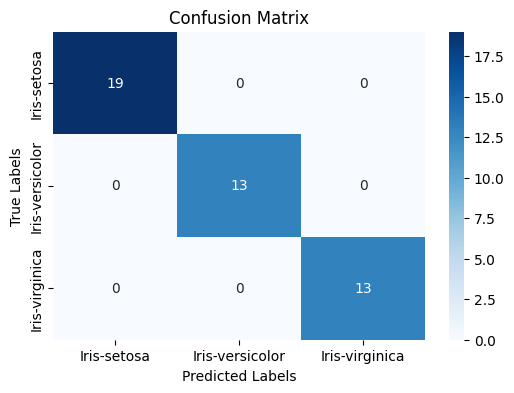

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
seaborn.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# <div style="text-align:center; border-radius:15px 15px; padding:7px; color:#9a68c0; margin:0; font-size:150%; font-family:Pacifico; background-color:#129717; overflow:hidden;"> Save Model </div>

In [8]:
joblib.dump(xgb_model, "xgboost_iris_model.joblib")
print("تم حفظ النموذج بنجاح.")


تم حفظ النموذج بنجاح.
